# An Decision Tree model for the Wine dataset

## Index
### Dataset
### Visualizing the Dataset
#### > 3D Visualization
#### > 2D Visualization
### Building the model
#### > Splitting the Data
#### > Building the model directly
#### > Alternatively, Applying grid Search for best parameters before building model
#### > Visualizing the model
### Visualizing the Decision Boundry
#### > 2D Boundry Visualization
### PCA Error Illustration
### Bonus Content

## Dataset

In [1]:
from sklearn.datasets import load_wine
x,y = load_wine(return_X_y=True)
print(x.shape," ",y.shape)

(178, 13)   (178,)


## Visualizing the Dataset

### 3D Visualization

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1] 
x3 = pca_result[:,2]

(178, 3)


In [3]:
# %matplotlib widget -> uncomment for interactive widgets

In [4]:
from random import randint
def get_colors(N):
    colors=[]
    for i in range(0,N):
        colors.append('#{:06x}'.format(randint(0, 256**3)))
    return colors

In [5]:
def get_handles(colors):
    handles=[]
    for i in range(len(colors)):
        handles.append(mpatches.Patch(color=colors[i], label='Class'+str(i)))
    return handles

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
fig = plt.figure()
ax = Axes3D(fig)
colors = get_colors(len(np.unique(y)))

ax.scatter(x1,x2,x3,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))
# plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

### 2D Visualization

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(178, 2)


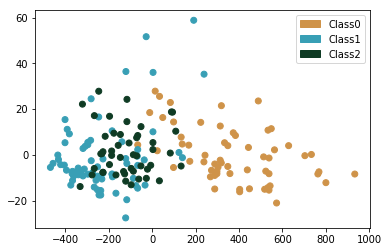

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#the dataset has len(np.unique(y)) Classes
colors = get_colors(len(np.unique(y)))

ax.scatter(x1,x2,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))

plt.show()

## Building the Model

### Splitting the Data

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

### Building the model directly

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
from sklearn.metrics import accuracy_score

y_pred=clf.predict(x_train)
print("Training Accuracy",accuracy_score(y_train, y_pred))

1.0

In [35]:
from sklearn.metrics import accuracy_score

y_pred=clf.predict(x_test)
print("Testing Accuracy",accuracy_score(y_test, y_pred))

0.9629629629629629

### Alternatively
### Applying grid Search for best parameters before building model

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a DT classifier
parameters={'min_samples_split' : np.arange(0.1,1,0.1),'max_depth': range(1,6),'max_features':range(1,x.shape[1])}
# clf_tree=tree.DecisionTreeClassifier()
# max_depth=4,min_samples_split=0.2
dt_clf = DecisionTreeClassifier()
dt_clf=GridSearchCV(dt_clf,parameters)
# Train the classifier
dt_clf.fit(x_train, y_train)

/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(1, 6), 'min_samples_split': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'max_features': range(1, 13)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print(dt_clf.best_score_)
accuracy=dt_clf.best_score_

0.9516129032258065


In [12]:
print(dt_clf.best_params_)

{'max_depth': 3, 'min_samples_split': 0.2, 'max_features': 5}


In [38]:
# summarize results
print("Best: %f using %s" % (dt_clf.best_score_, dt_clf.best_params_))
means = dt_clf.cv_results_['mean_test_score']
stds = dt_clf.cv_results_['std_test_score']
params = dt_clf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.951613 using {'max_depth': 3, 'min_samples_split': 0.2, 'max_features': 5}
0.467742 (0.093402) with: {'max_depth': 1, 'min_samples_split': 0.1, 'max_features': 1}
0.540323 (0.035017) with: {'max_depth': 1, 'min_samples_split': 0.2, 'max_features': 1}
0.580645 (0.027484) with: {'max_depth': 1, 'min_samples_split': 0.30000000000000004, 'max_features': 1}
0.500000 (0.106480) with: {'max_depth': 1, 'min_samples_split': 0.4, 'max_features': 1}
0.556452 (0.061839) with: {'max_depth': 1, 'min_samples_split': 0.5, 'max_features': 1}
0.604839 (0.058833) with: {'max_depth': 1, 'min_samples_split': 0.6, 'max_features': 1}
0.588710 (0.054131) with: {'max_depth': 1, 'min_samples_split': 0.7000000000000001, 'max_features': 1}
0.604839 (0.014204) with: {'max_depth': 1, 'min_samples_split': 0.8, 'max_features': 1}
0.524194 (0.133543) with: {'max_depth': 1, 'min_samples_split': 0.9, 'max_features': 1}
0.588710 (0.051104) with: {'max_depth': 1, 'min_samples_split': 0.1, 'max_features': 2}
0.5967

In [13]:
final_model = dt_clf.best_estimator_

In [14]:
y_pred=final_model.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8888888888888888

### Visualizing the model

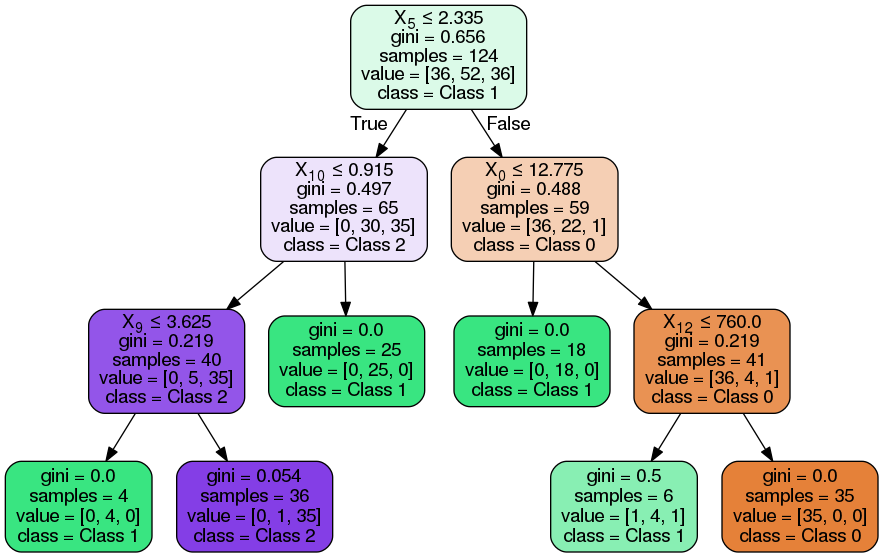

In [16]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(final_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,class_names=['Class 0','Class 1','Class 2'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Visualizing the Decision Boundry

### 2D Boundry Visualization

Task 1-> Perform PCA; Get min and max array values for 2D visualization

In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(178, 2)


In [40]:
x1_min, x1_max = x1.min() - 10, x1.max() + 10
x2_min, x2_max = x2.min() - 10, x2.max() + 10

Task 2-> Get Grid

In [41]:
import numpy as np
resolution=10
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

In [42]:
xx1.shape

(11, 143)

In [43]:
xx2.shape

(11, 143)

Task 3-> Get Reverse PCA Values

In [44]:
temp_points=[]
for i in range(xx1.shape[0]):
    for j in range(xx1.shape[1]):
        temp_points.append([xx1[i,j],xx2[i,j]])
temp_points=np.array(temp_points)

In [45]:
temp_points.shape

(1573, 2)

In [46]:
original_space_temp_points=pca.inverse_transform(temp_points)

Task 4-> Predict Results

In [47]:
Z=final_model.predict(original_space_temp_points)

Task 5-> Plot points and boundries

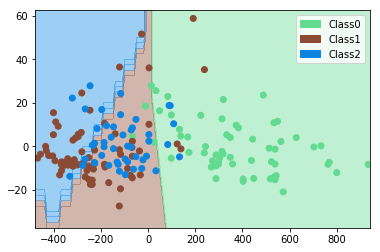

In [51]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib


Z = Z.reshape(xx1.shape)

colors = get_colors(len(np.unique(y)))

plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

plt.scatter(x1,x2,c=y,cmap=matplotlib.colors.ListedColormap(colors))

plt.legend(handles=get_handles(colors))

plt.show()

In [27]:
# Decision Boundry Plotting with Decision Tree in not accurate due to PCA error

### PCA Error Illustration

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x_train)

print(pca_result.shape)

x1 = pca_result[:,0]
x2 = pca_result[:,1]

(124, 2)


In [33]:
temp_temp=[]
for i in range(len(x1)):
    temp_temp.append([x1[i],x2[i]])
temp_temp=pca.inverse_transform(temp_temp)
TZ=final_model.predict(temp_temp)
print("With data directly accuracy was", accuracy)
print("With data recreated with PCA accuracy is",accuracy_score(y_train, TZ))

With data directly accuracy was 0.9516129032258065
With data recreated with PCA accuracy is 0.5967741935483871


* Bonus Content
   * [Medium](https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3)
